# Project: Stock Price Predictor

In this project, our aim is to build up a model and accurately predict the future return of a stock, as well as suggesting buying and selling points of stocks. The project is divided into 2 parts, first building the model, and next giving suggestions based in indexes. We will be using linear regression technique to build our benchmark model and predict the returns, then we will be using MACD index and RSI index. We will be using yahoo finance as our data source. 


## Get the Data

We first download the data from yahoo finance, and save the data to local storage. 

In [1]:
import pandas as pd
import datetime
import sys
# !{sys.executable} -m pip install tensorflow
# !{sys.executable} -m pip install lstm
# !{sys.executable} -m pip install keras
# !{sys.executable} -m pip install yfinance

import yfinance as yf
index_name = "GOOGL"
data = yf.download(index_name, '2023-11-07','2023-12-06', interval="5m")
file_name = index_name + ".csv"
data.to_csv(file_name,index = False)
print(data)

[*********************100%%**********************]  1 of 1 completed
                                 Open        High         Low       Close  \
Datetime                                                                    
2023-11-07 09:30:00-05:00  130.710007  131.054993  130.179993  130.179993   
2023-11-07 09:35:00-05:00  130.176804  130.220001  129.880005  130.199997   
2023-11-07 09:40:00-05:00  130.218307  130.707901  130.218307  130.524994   
2023-11-07 09:45:00-05:00  130.529999  130.639999  130.320007  130.520004   
2023-11-07 09:50:00-05:00  130.509995  130.639999  130.439697  130.619995   
...                               ...         ...         ...         ...   
2023-12-05 15:35:00-05:00  130.970001  130.994995  130.880798  130.889999   
2023-12-05 15:40:00-05:00  130.891006  130.970001  130.839996  130.850006   
2023-12-05 15:45:00-05:00  130.854996  130.929993  130.759995  130.807404   
2023-12-05 15:50:00-05:00  130.800003  130.910004  130.720001  130.740005   
2023-12

## Preprocess the data

We want to normalize the data for better prediction, so we need to process the data.

In [2]:
import pandas as pd
import numpy as np

data = pd.read_csv(file_name)
print(data.head())

print("\n")
print("Open   --- mean :", np.mean(data['Open']),  "  \t Std: ", np.std(data['Open']),  "  \t Max: ", np.max(data['Open']),  "  \t Min: ", np.min(data['Open']))
print("High   --- mean :", np.mean(data['High']),  "  \t Std: ", np.std(data['High']),  "  \t Max: ", np.max(data['High']),  "  \t Min: ", np.min(data['High']))
print("Low    --- mean :", np.mean(data['Low']),   "  \t Std: ", np.std(data['Low']),   "  \t Max: ", np.max(data['Low']),   "  \t Min: ", np.min(data['Low']))
print("Close  --- mean :", np.mean(data['Close']), "  \t Std: ", np.std(data['Close']), "  \t Max: ", np.max(data['Close']), "  \t Min: ", np.min(data['Close']))
print("Volume --- mean :", np.mean(data['Volume']),"  \t Std: ", np.std(data['Volume']),"  \t Max: ", np.max(data['Volume']),"  \t Min: ", np.min(data['Volume']))


         Open        High         Low       Close   Adj Close   Volume
0  130.710007  131.054993  130.179993  130.179993  130.179993  1190728
1  130.176804  130.220001  129.880005  130.199997  130.199997   436396
2  130.218307  130.707901  130.218307  130.524994  130.524994   533902
3  130.529999  130.639999  130.320007  130.520004  130.520004   256744
4  130.509995  130.639999  130.439697  130.619995  130.619995   209897


Open   --- mean : 133.79721551561795   	 Std:  2.6846336586876087   	 Max:  139.1999969482422   	 Min:  128.00999450683594
High   --- mean : 133.90962372628212   	 Std:  2.6784214496481025   	 Max:  139.4199981689453   	 Min:  128.125
Low    --- mean : 133.68465869718094   	 Std:  2.6911741720725275   	 Max:  138.9600067138672   	 Min:  127.9000015258789
Close  --- mean : 133.7989787077935   	 Std:  2.683692791458853   	 Max:  139.2050018310547   	 Min:  128.02000427246094
Volume --- mean : 277446.2056504599   	 Std:  278198.39370659   	 Max:  3699092   	 Min:  4655

**Remove Unncessary data, and keep only open, close, volume** 

In [3]:
import preprocess_data as ppd
print(data)
stocks = ppd.remove_data(data)
print(stocks)

#Print the dataframe head and tail
print(stocks.head())
print("---")
print(stocks.tail())

E:\Anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


            Open        High         Low       Close   Adj Close   Volume
0     130.710007  131.054993  130.179993  130.179993  130.179993  1190728
1     130.176804  130.220001  129.880005  130.199997  130.199997   436396
2     130.218307  130.707901  130.218307  130.524994  130.524994   533902
3     130.529999  130.639999  130.320007  130.520004  130.520004   256744
4     130.509995  130.639999  130.439697  130.619995  130.619995   209897
...          ...         ...         ...         ...         ...      ...
1517  130.970001  130.994995  130.880798  130.889999  130.889999   207418
1518  130.891006  130.970001  130.839996  130.850006  130.850006   266768
1519  130.854996  130.929993  130.759995  130.807404  130.807404   472249
1520  130.800003  130.910004  130.720001  130.740005  130.740005   526641
1521  130.740005  131.029999  130.740005  130.990005  130.990005  1566153

[1522 rows x 6 columns]
      Item        Open       Close   Volume
0        0  130.710007  130.179993  1190728

**Now we want to visualize the data**

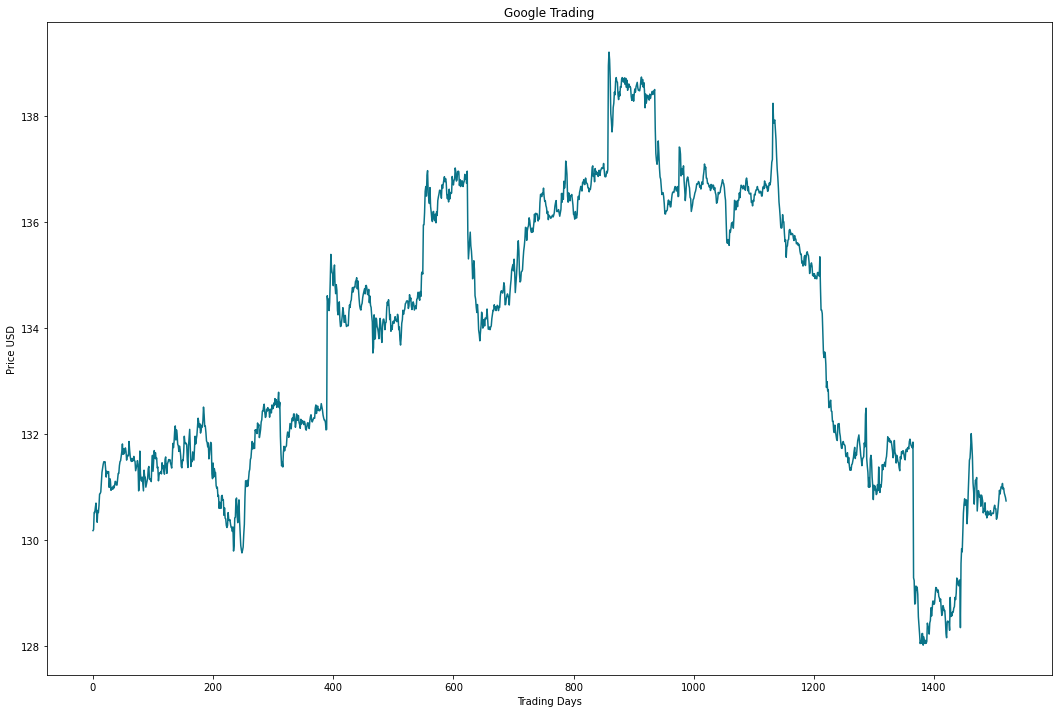

In [4]:
import visualize

visualize.plot_basic(stocks)

**Normalize the data using minmaxscaler function** 

In [5]:
stocks = ppd.get_normalised_data(stocks)
print(stocks.head())

print("\n")
print("Open   --- mean :", np.mean(stocks['Open']),  "  \t Std: ", np.std(stocks['Open']),  "  \t Max: ", np.max(stocks['Open']),  "  \t Min: ", np.min(stocks['Open']))
print("Close  --- mean :", np.mean(stocks['Close']), "  \t Std: ", np.std(stocks['Close']), "  \t Max: ", np.max(stocks['Close']), "  \t Min: ", np.min(stocks['Close']))
print("Volume --- mean :", np.mean(stocks['Volume']),"  \t Std: ", np.std(stocks['Volume']),"  \t Max: ", np.max(stocks['Volume']),"  \t Min: ", np.min(stocks['Volume']))

   Item      Open     Close    Volume
0     0  0.241288  0.193115  0.313254
1     1  0.193638  0.194903  0.106731
2     2  0.197347  0.223960  0.133426
3     3  0.225201  0.223514  0.057545
4     4  0.223414  0.232453  0.044719


Open   --- mean : 0.5173574392955402   	 Std:  0.2398901121795427   	 Max:  1.0   	 Min:  0.0
Close  --- mean : 0.5168370577415985   	 Std:  0.23992923118129897   	 Max:  1.0   	 Min:  0.0
Volume --- mean : 0.06298093121993562   	 Std:  0.07565154975028397   	 Max:  1.0   	 Min:  0.0


**Visualize the data again**

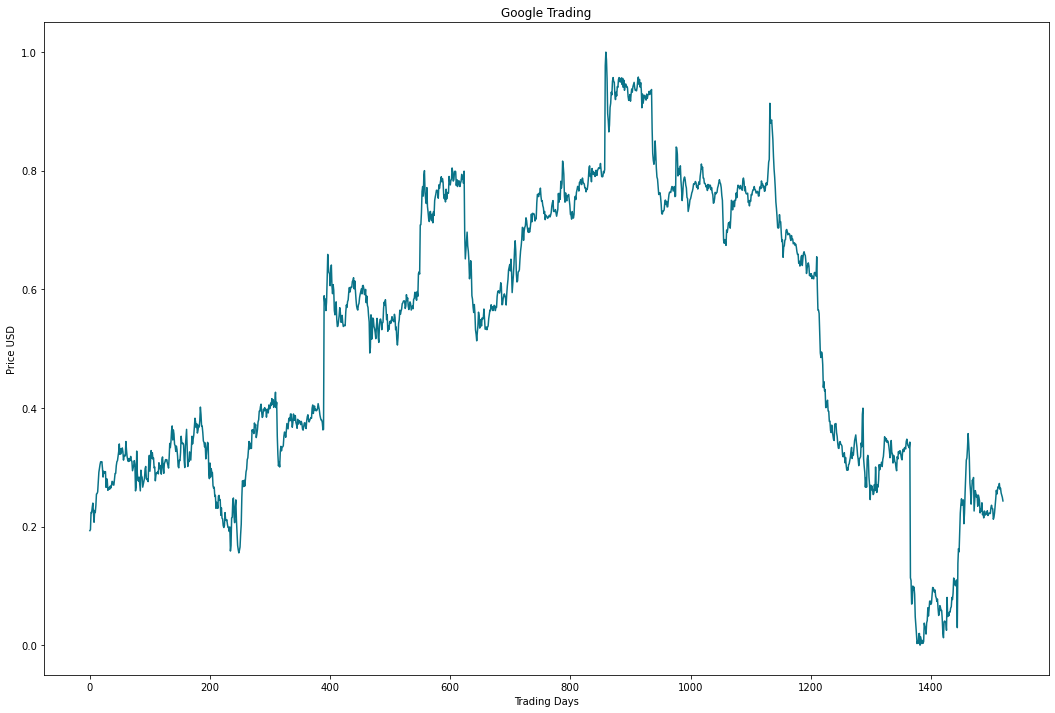

In [6]:
visualize.plot_basic(stocks)

**Save the processed data** 

In [7]:
file_name = file_name[:-4] + "_preprocessed.csv"
stocks.to_csv(file_name,index= False)

## Linear Regression Model

We use linear regression to train a basic model, and predict the returns.

**Load the preprocessed data** 

In [8]:
import math
import pandas as pd
import numpy as np
from IPython.display import display
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import TimeSeriesSplit

import visualize as vs
import stock_data as sd
import LinearRegressionModel

stocks = pd.read_csv(file_name)
display(stocks.head())

,Item,Open,Close,Volume
0,0,0.241288,0.193115,0.313254
1,1,0.193638,0.194903,0.106731
2,2,0.197347,0.223960,0.133426
3,3,0.225201,0.223514,0.057545
4,4,0.223414,0.232453,0.044719


**Split data into train and test sets, and train the model** 

In [9]:
X_train, X_test, y_train, y_test, label_range= sd.train_test_split_linear_regression(stocks)

print("x_train", X_train.shape)
print("y_train", y_train.shape)
print("x_test", X_test.shape)
print("y_test", y_test.shape)
model = LinearRegressionModel.build_model(X_train,y_train)

x_train (1042, 1)
y_train (1042, 1)
x_test (479, 1)
y_test (479, 1)


**Get prediction on test set and plot** 

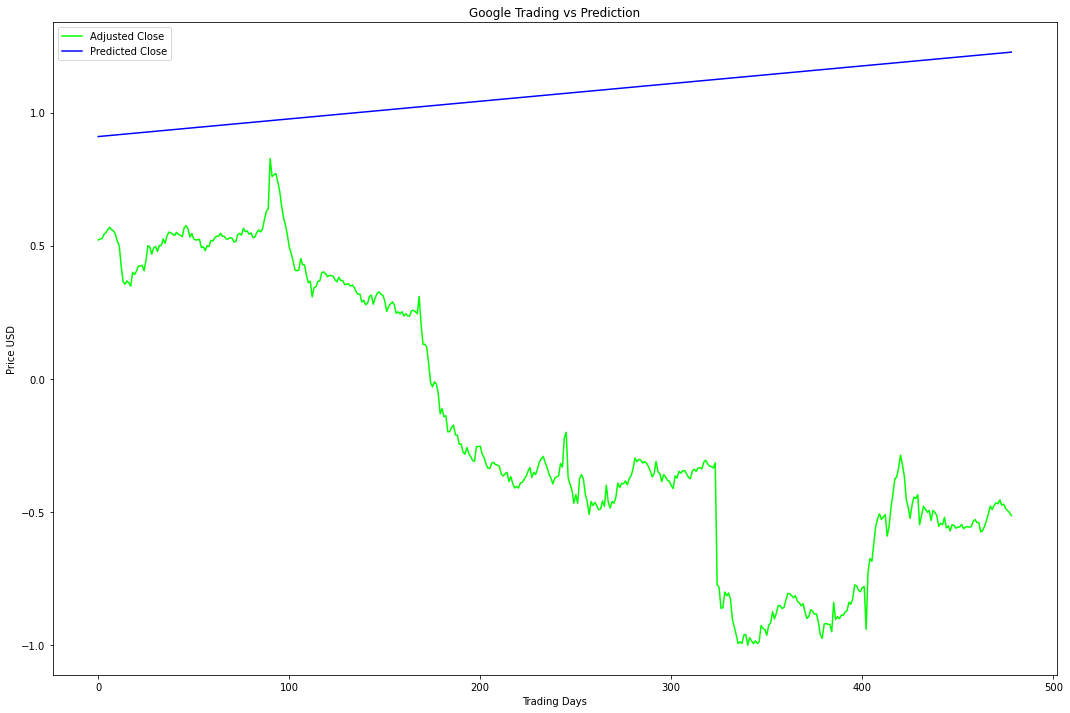

In [10]:
predictions = LinearRegressionModel.predict_prices(model,X_test, label_range)
vs.plot_prediction(y_test,predictions)

**Accuracy of the prediction** 

In [11]:
trainScore = mean_squared_error(X_train, y_train)
print('Train Score: %.4f MSE (%.4f RMSE)' % (trainScore, math.sqrt(trainScore)))

testScore = mean_squared_error(predictions, y_test)
print('Test Score: %.8f MSE (%.8f RMSE)' % (testScore, math.sqrt(testScore)))

Train Score: 0.2265 MSE (0.4759 RMSE)
Test Score: 1.88791304 MSE (1.37401348 RMSE)


## Long-Sort Term Memory Model

We use LSTM to train a more accurate model, and predict the returns.

### Basic LSTM Model

First lets make a basic LSTM model. We would use keras libraries to do so.

In [12]:
import math
import pandas as pd
import numpy as np
from IPython.display import display

from keras.layers import Dense, Activation, Dropout
from keras.layers import LSTM
from keras.models import Sequential
from keras.metrics import mean_squared_error
from sklearn.model_selection import StratifiedKFold

import lstm, time #helper libraries

import visualize as vs
import stock_data as sd
import LinearRegressionModel

stocks = pd.read_csv(file_name)
stocks_data = stocks.drop(['Item'], axis =1)

display(stocks_data.head())
print(stocks_data)

,Open,Close,Volume
0,0.241288,0.193115,0.313254
1,0.193638,0.194903,0.106731
2,0.197347,0.223960,0.133426
3,0.225201,0.223514,0.057545
4,0.223414,0.232453,0.044719


          Open     Close    Volume
0     0.241288  0.193115  0.313254
1     0.193638  0.194903  0.106731
2     0.197347  0.223960  0.133426
3     0.225201  0.223514  0.057545
4     0.223414  0.232453  0.044719
...        ...       ...       ...
1516  0.264075  0.264639  0.033095
1517  0.264522  0.256593  0.044040
1518  0.257463  0.253018  0.060289
1519  0.254245  0.249209  0.116547
1520  0.249330  0.243183  0.131438

[1521 rows x 3 columns]


**Step 2 :** Split train and test data sets and Unroll train and test data for lstm model

In [13]:
X_train, X_test,y_train, y_test = sd.train_test_split_lstm(stocks_data, 5)

unroll_length = 50
X_train = sd.unroll(X_train, unroll_length)
X_test = sd.unroll(X_test, unroll_length)
y_train = y_train[-X_train.shape[0]:]
y_test = y_test[-X_test.shape[0]:]

print("x_train", X_train.shape)
print("y_train", y_train.shape)
print("x_test", X_test.shape)
print("y_test", y_test.shape)

x_train (965, 50, 3)
y_train (965,)
x_test (446, 50, 3)
y_test (446,)


**Step 3 :** Build a basic Long-Short Term Memory model

In [14]:
# build basic lstm model
model = lstm.build_basic_model(input_dim = X_train.shape[-1],output_dim = unroll_length, return_sequences=True)

# Compile the model
start = time.time()
model.compile(loss='mean_squared_error', optimizer='adam')
print('compilation time : ', time.time() - start)



compilation time :  0.050752878189086914


**Step 4:** Train the model

In [15]:
model.fit(
    X_train,
    y_train,
    epochs=1,
    validation_split=0.05)


29/29 [==============================] - 5s 60ms/step - loss: 0.0394 - val_loss: 8.0249e-04


**Step 5:** make prediction using test data

In [16]:
predictions = model.predict(X_test)

14/14 [==============================] - 1s 11ms/step


**Step 6:** Plot the results

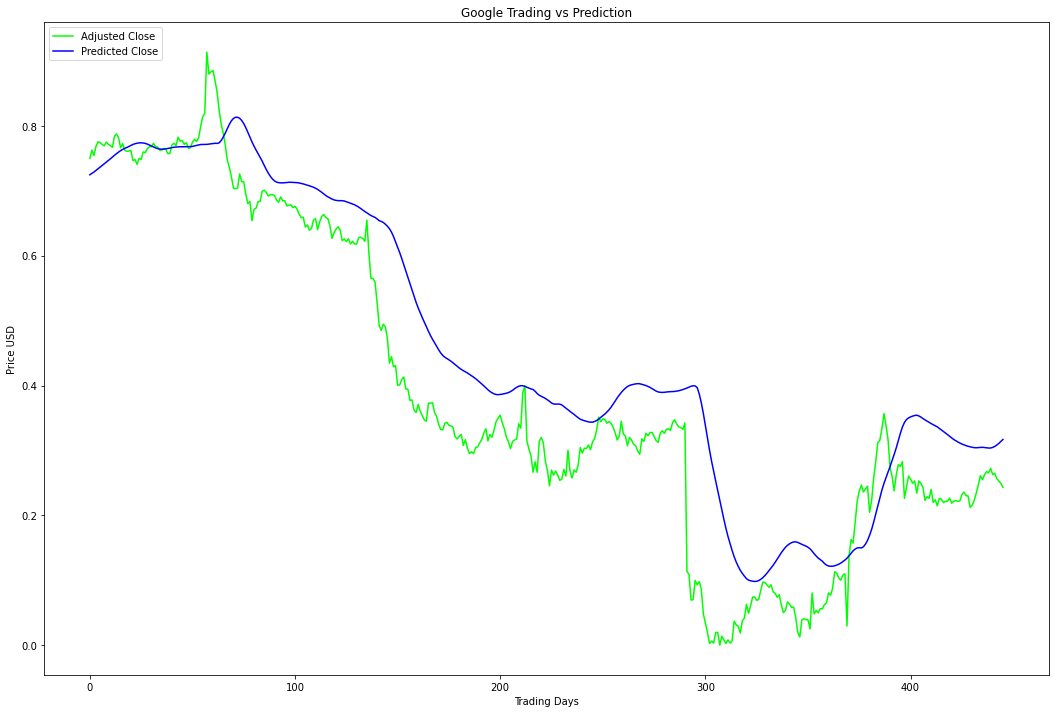

In [17]:
vs.plot_lstm_prediction(y_test,predictions)

** Step 7:** Get the test score.

In [18]:
trainScore = model.evaluate(X_train, y_train, verbose=0)
print('Train Score: %.8f MSE (%.8f RMSE)' % (trainScore, math.sqrt(trainScore)))

testScore = model.evaluate(X_test, y_test, verbose=0)
print('Test Score: %.8f MSE (%.8f RMSE)' % (testScore, math.sqrt(testScore)))

Train Score: 0.00430132 MSE (0.06558448 RMSE)
Test Score: 0.00982680 MSE (0.09913020 RMSE)


### Improved LSTM Model

**Step 1: ** Build an improved LSTM model

In [19]:
# Set up hyperparameters
batch_size = 100
epochs = 5

# build improved lstm model
model = lstm.build_improved_model( X_train.shape[-1],output_dim = unroll_length, return_sequences=True)

start = time.time()
#final_model.compile(loss='mean_squared_error', optimizer='adam')
model.compile(loss='mean_squared_error', optimizer='adam')
print('compilation time : ', time.time() - start)

compilation time :  0.005856037139892578


**Step 2: ** Train improved LSTM model

In [20]:
model.fit(X_train, 
          y_train, 
          batch_size=batch_size,
          epochs=epochs,
          verbose=2,
          validation_split=0.05
         )

Epoch 1/5
10/10 - 5s - loss: 0.1178 - val_loss: 0.0061 - 5s/epoch - 522ms/step
Epoch 2/5
10/10 - 1s - loss: 0.0150 - val_loss: 0.0014 - 647ms/epoch - 65ms/step
Epoch 3/5
10/10 - 1s - loss: 0.0089 - val_loss: 0.0023 - 664ms/epoch - 66ms/step
Epoch 4/5
10/10 - 1s - loss: 0.0065 - val_loss: 0.0014 - 657ms/epoch - 66ms/step
Epoch 5/5
10/10 - 1s - loss: 0.0054 - val_loss: 0.0014 - 638ms/epoch - 64ms/step


**Step 3:** Make prediction on improved LSTM model

In [21]:
# Generate predictions 
predictions = model.predict(X_test, batch_size=batch_size)

5/5 [==============================] - 1s 30ms/step


**Step 4:** plot the results

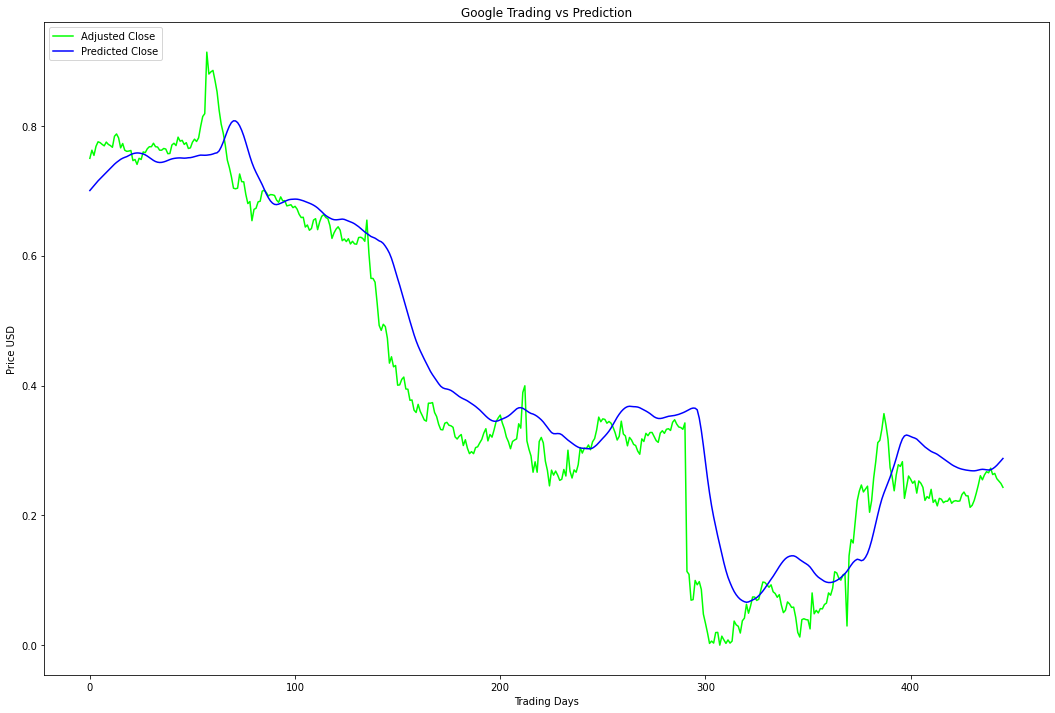

In [22]:
vs.plot_lstm_prediction(y_test,predictions)

**Step 5:** Get the test score

In [23]:
trainScore = model.evaluate(X_train, y_train, verbose=0)
print('Train Score: %.8f MSE (%.8f RMSE)' % (trainScore, math.sqrt(trainScore)))

testScore = model.evaluate(X_test, y_test, verbose=0)
print('Test Score: %.8f MSE (%.8f RMSE)' % (testScore, math.sqrt(testScore)))

Train Score: 0.00286864 MSE (0.05355965 RMSE)
Test Score: 0.00548880 MSE (0.07408644 RMSE)


In [24]:
range = [np.amin(stocks_data['Close']), np.amax(stocks_data['Close'])]

#Calculate the stock price delta in $

true_delta = testScore*(range[1]-range[0])
print('Delta Price: %.6f - RMSE * Adjusted Close Range' % true_delta)    

Delta Price: 0.005489 - RMSE * Adjusted Close Range


# Checking Robustness of the model

In this section we will check robustness of our LSTM model. I have used new unseen datasets for this from July 1, 2017 to July 20,2017. I have downloaded the data sets from google finance website to check for robustness of the model.

In [25]:
import preprocess_data as ppd

data = pd.read_csv('googl.csv')

stocks = ppd.remove_data(data)

stocks = ppd.get_normalised_data(stocks)

stocks = stocks.drop(['Item'], axis = 1)
#Print the dataframe head and tail
print(stocks.head())

X = stocks[:].values
Y = stocks[:]['Close'].values

X = sd.unroll(X,1)
Y = Y[-X.shape[0]:]

print(X.shape)
print(Y.shape)

# Generate predictions 
predictions = model.predict(X)

#get the test score
testScore = model.evaluate(X, Y, verbose=0)
print('Test Score: %.4f MSE (%.4f RMSE)' % (testScore, math.sqrt(testScore)))

       Open     Close    Volume
0  0.241288  0.193115  0.313254
1  0.193638  0.194903  0.106731
2  0.197347  0.223960  0.133426
3  0.225201  0.223514  0.057545
4  0.223414  0.232453  0.044719
(1520, 1, 3)
(1520,)
48/48 [==============================] - 1s 2ms/step
Test Score: 0.2645 MSE (0.5143 RMSE)


In [26]:
import network as nt
import indicators as ind
import mpl_finance_ext as mfe
import matplotlib.pyplot as plt
data = ind.relative_strength_index(df=data, n=14)
data = ind.bollinger_bands(df=data, n=20, std=4, add_ave=False)
data = ind.exponential_moving_average(df=data, n=10)
data = ind.moving_average(df=data, n=12)
data = ind.macd(df=data, n_fast=12, n_slow=26)
print(stocks)


Instructions for updating:
non-resource variables are not supported in the long term


ValueError: columns overlap but no suffix specified: Index(['Close'], dtype='object')

In [ ]:
# Cut DataFrame
data = data.iloc[40::]
# Reset index
data = data.reset_index()
# Delete old index
data = data.drop('index', 1)
# Normalize data
data_n = (data - data.mean()) / (data.max() - data.min())

In [ ]:
test_dataset_size = 0.05

dataset_train_length = len(data_n.index) -int(len(data_n.index) * test_dataset_size)

In [ ]:
fig, _ = plt.subplots(facecolor=mfe.background_color)
# ax0 = plt.subplot2grid(
#     (10, 8), (0, 0),
#     rowspan=6, colspan=8,
#     facecolor=mfe.background_color
# )

    # Plot RSI
ax1 = plt.subplot2grid(
    (10, 1), (6, 0),
    rowspan=2, colspan=8,
    facecolor=mfe.background_color
)
ax1.axhline(0.3, linestyle='--', linewidth=1.5, color='grey')
ax1.axhline(0.7, linestyle='--', linewidth=1.5, color='grey')

mfe.plot(
    data=data_n,
    name='RSI_14',
    plot_columns=['RSI_14'],
    axis=ax1,
    fig=fig,
    xhline_red=0.8,
    xhline_green=0.2,
    vline=dataset_train_length - 1,
    vspan=[dataset_train_length - 1, len(data_n.index)]
)

    # Plot MACD
ax1 = plt.subplot2grid(
    (10, 8), (8, 0),
    rowspan=2, colspan=8,
    facecolor=mfe.background_color
)

mfe.plot(
    data=data_n,
    name='MACD',
    plot_columns=['MACD_12_26', 'MACDsign_12_26', 'MACDdiff_12_26'],
    axis=ax1,
    fig=fig,
    xhline_dashed1=0,
    vline=dataset_train_length - 1,
    vspan=[dataset_train_length - 1, len(data_n.index)]
)
plt.subplots_adjust(
    left=.07, bottom=.05, right=.94,
    top=.96, hspace=0.2, wspace=0.03
)
plt.show()